# In this code I compute the correlation function of the 10 maps created with its respective media and standar desviation

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import healpy as hp

In [2]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))

In [3]:
sys.path.insert(0,camb_path)

In [4]:
import camb
from camb import model, initialpower

Set a new parameters for CAMB I use the parameters 68% intervals for base  Λ𝐶𝐷𝑀  model for Planck power spectra, and combination with CMB lensing reconstruction and BAO. It can be found in arXiv:1807.06209

In [5]:
pars=camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

Calculate results for this parameters

In [6]:
results = camb.get_results(pars)

In [7]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


Plot the total lensed CMB power spectra

In [8]:
#The cls
# We did the zero matrix with len 2551
# we fill with the first values of a power[total]
totCL=np.zeros(len(powers['total']))
for i in range(len(powers['total'])):
    totCL[i]=powers['total'][i][0]

unlensedCL=powers['unlensed_scalar']
#shape
print(totCL.shape)

(2551,)


In [9]:
ls = np.arange(totCL.shape[0])
print(ls.shape)
print(ls)
print(totCL.shape[0])

(2551,)
[   0    1    2 ... 2548 2549 2550]
2551


Text(0.5, 1.0, 'PS of the cmb by camb with Planck 2018 parameters')

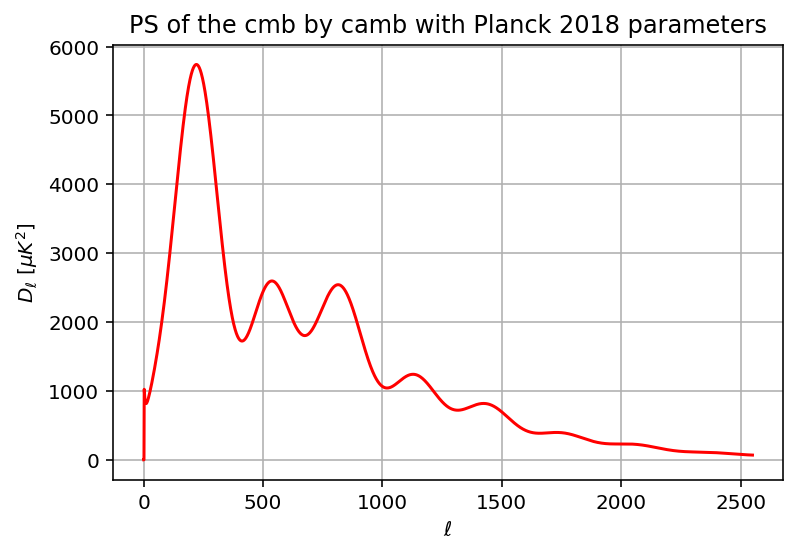

In [10]:
#plt.plot(ls, unlensedCL[:,0], color = 'y')
plt.plot(ls, totCL, color = 'r')

plt.xlabel('$\ell$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.grid()
plt.title('PS of the cmb by camb with Planck 2018 parameters')

## Creation 10 maps with healpy routine synfast

In [13]:
lmax = 2500
nside=2048
mapa_cl_1 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_2 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_3 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))

In [14]:
mapa_cl_4 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_5 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_6 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))

In [15]:
mapa_cl_7 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_8 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_9 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_10 = hp.sphtfunc.synfast(totCL, nside=nside, lmax =lmax, fwhm=np.radians(5/60))

### Computing the $C_{ls}$ with healpy routine anafast

In [17]:
lmax = 2500
cl1=hp.anafast(mapa_cl_1, lmax=lmax)
cl2=hp.anafast(mapa_cl_2, lmax=lmax)
l1 = np.arange(len(cl1))
l2 = np.arange(len(cl2))

In [18]:
print(l1)
print(l2)

[   0    1    2 ... 2498 2499 2500]
[   0    1    2 ... 2498 2499 2500]


In [19]:
cl3=hp.anafast(mapa_cl_3, lmax=lmax)
cl4=hp.anafast(mapa_cl_4, lmax=lmax)
cl5=hp.anafast(mapa_cl_5, lmax=lmax)
cl6=hp.anafast(mapa_cl_6, lmax=lmax)

In [22]:
cl7=hp.anafast(mapa_cl_7, lmax=lmax)

In [23]:
cl8=hp.anafast(mapa_cl_8, lmax=lmax)
cl9=hp.anafast(mapa_cl_9, lmax=lmax)
cl10=hp.anafast(mapa_cl_10, lmax=lmax)

Legendre polynomials

Legendre polynomials using recursity relation

In [25]:
def P(n,x):
    if (n==0):
        return 1
    elif (n==1):
        return x
    else:
        return (((2 * n)-1)*x * P(n-1, x)-(n-1)*P(n-2, x))/float(n)

Plot the polynomials

Text(0, 0.5, 'Pn')

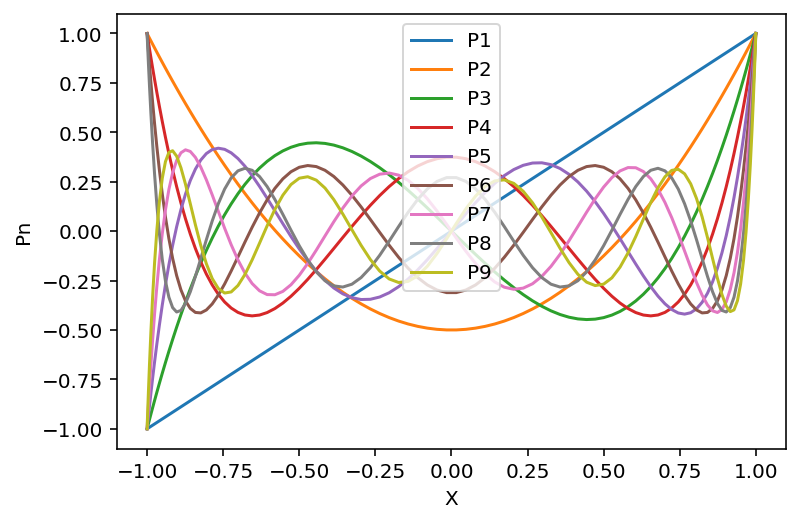

In [26]:
# I define the independent variable
theta = np.linspace(0, np.pi, 100)
# I performance a change of variable
x=np.cos(theta)
#plot the Legendre polynomial versus X
matplotlib.use('Agg')
for n in range(1,10):
    plt.plot(x, P(n,x), label = 'P'+str(n))
plt.legend(loc ="best") 
plt.xlabel("X") 
plt.ylabel("Pn") 
#plt.show() 

I compute the correlation function $C(\theta)$

In [29]:
suma_1=0
for l in range(10):
    suma_1 = suma_1 +(2*l +1)*cl1[l]*P(l,x)
c_theta_1=suma_1/4/np.pi

In [34]:
suma_2=0
suma_3=0
suma_4=0
suma_5=0
suma_6=0
suma_7=0
suma_8=0
suma_9=0
suma_10=0
for l in range(10):
    suma_2 = suma_2 +(2*l+1)*cl2[l]*P(l,x)
    suma_3 = suma_3 +(2*l+1)*cl3[l]*P(l,x)
    suma_4 = suma_4 +(2*l+1)*cl4[l]*P(l,x)
    suma_5 = suma_5 +(2*l+1)*cl5[l]*P(l,x)
    suma_6 = suma_6 +(2*l+1)*cl6[l]*P(l,x)
    suma_7 = suma_7 +(2*l+1)*cl7[l]*P(l,x)
    suma_8 = suma_8 +(2*l+1)*cl8[l]*P(l,x)
    suma_9 = suma_9 +(2*l+1)*cl9[l]*P(l,x)
    suma_10 = suma_10 +(2*l+1)*cl10[l]*P(l,x)
c_theta_2= suma_2/4/np.pi
c_theta_3= suma_3/4/np.pi
c_theta_4= suma_4/4/np.pi
c_theta_5= suma_5/4/np.pi
c_theta_6= suma_6/4/np.pi
c_theta_7= suma_7/4/np.pi
c_theta_8= suma_8/4/np.pi
c_theta_9= suma_9/4/np.pi
c_theta_10= suma_10/4/np.pi



/tmp/ipykernel_9645/782942947.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(theta*180/np.pi, c_theta_1, 'r-', color='r', label='$C_1(\theta)$ 1st cls')
/tmp/ipykernel_9645/782942947.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(theta*180/np.pi, c_theta_2, 'r-', color='b', label='$C_2(\theta)$ 2nd cls')
/tmp/ipykernel_9645/782942947.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(theta*180/np.pi, c_theta_3, 'r-', color='cyan', label='$C_3(\theta)$ 3rd cls')
/tmp/ipykernel_9645/782942947.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The key

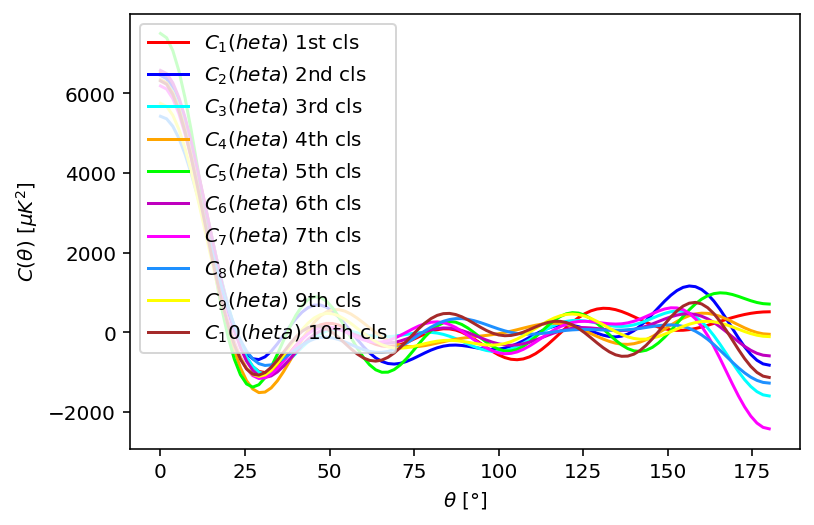

In [40]:
plt.plot(theta*180/np.pi, c_theta_1, 'r-', color='r', label='$C_1(\theta)$ 1st cls')
plt.plot(theta*180/np.pi, c_theta_2, 'r-', color='b', label='$C_2(\theta)$ 2nd cls')
plt.plot(theta*180/np.pi, c_theta_3, 'r-', color='cyan', label='$C_3(\theta)$ 3rd cls')
plt.plot(theta*180/np.pi, c_theta_4, 'r-', color='orange', label='$C_4(\theta)$ 4th cls')
plt.plot(theta*180/np.pi, c_theta_5, 'r-', color='lime', label='$C_5(\theta)$ 5th cls')
plt.plot(theta*180/np.pi, c_theta_6, 'r-', color='m', label='$C_6(\theta)$ 6th cls')
plt.plot(theta*180/np.pi, c_theta_7, 'r-', color='magenta', label='$C_7(\theta)$ 7th cls')
plt.plot(theta*180/np.pi, c_theta_8, 'r-', color='dodgerblue', label='$C_8(\theta)$ 8th cls')
plt.plot(theta*180/np.pi, c_theta_9, 'r-', color='yellow', label='$C_9(\theta)$ 9th cls')
plt.plot(theta*180/np.pi, c_theta_10, 'r-', color='brown', label='$C_10(\theta)$ 10th cls')
plt.xlabel(r'$\theta~[°]$')
plt.ylabel(r'$C(\theta)~[\mu K^2]$')
plt.legend(loc ="best")
plt.show()

## median and standard desviation

In [42]:
from astroML import stats

In [50]:
stats.sigmaG(c_theta_1)
stats.medianG(c_theta_1)

AttributeError: module 'astroML.stats' has no attribute 'medianG'

In [48]:
?stats